In [1]:
import pandas as pd
import numpy as np

In [2]:
emotion_dict = pd.read_csv('lexicon_spanish_fixed.csv', encoding='latin1')
articles_eldiario = pd.read_csv('..\larazon-webscrapping\eldiario2019-01-01_2020-01-30.csv')

In [3]:
df_emotion = pd.DataFrame(emotion_dict)
df_articles = pd.DataFrame(articles_eldiario)


In [4]:
print (df_emotion.emotion.unique())
df_emotion = df_emotion.drop(columns=['Unnamed: 0', 'index'])
df_emotion

['sadness' 'surprise' 'anticipation' 'anger' 'fear' 'disgust' 'trust'
 'joy']


,Spanish-es,emotion
0,a ciegas,sadness
1,a hurtadillas,surprise
2,a la deriva,anticipation
3,a la fuerza,anger
4,aaaaaaah,fear
...,...,...
11876,xenofobios,disgust
11877,xoxas,joy
11878,yaaaaos,fear
11879,yogos,joy


In [5]:
df_articles

,Unnamed: 0,article_name,article_date,article_category,article_words,article_len,article_URL
0,0,politica.php?n=11&-comienza-un-2019-electoral-...,2019-01-01,politica,"['Comienza', 'enero', 'de', '2019', 'con', 'un...",759,https://www.eldiario.net/noticias/2019/2019_01...
1,1,sociedad.php?n=27&-intento-matarla-en-dos-ocas...,2019-01-01,sociedad,"['En', 'las', 'últimas', 'la', 'Policía', 'apr...",365,https://www.eldiario.net/noticias/2019/2019_01...
2,2,nacional.php?n=23&-medicos-ratifican-paro-naci...,2019-01-01,nacional,"['El', '2019', 'se', 'iniciará', 'con', 'medid...",569,https://www.eldiario.net/noticias/2019/2019_01...
3,3,politica.php?n=13&-fallecio-alberto-zuazo-nath...,2019-01-03,politica,"['Los', 'teclados', 'de', 'las', 'computadoras...",516,https://www.eldiario.net/noticias/2019/2019_01...
4,4,sociedad.php?n=47&-primer-dia-de-2019-tres-fem...,2019-01-03,sociedad,"['Durante', 'el', 'primer', 'día', 'de', 'este...",654,https://www.eldiario.net/noticias/2019/2019_01...
...,...,...,...,...,...,...,...
1167,1167,sociedad.php?n=27&-bascope-inicia-sexto-anio-c...,2020-01-28,sociedad,"['La', 'audiencia', 'del', 'juicio', 'oral', '...",903,https://www.eldiario.net/noticias/2020/2020_01...
1168,1168,nacional.php?n=47&-santa-cruz-cuenta-con-un-mo...,2020-01-28,nacional,"['Santa', 'Cruz.-', 'En', 'la', 'búsqueda', 'd...",516,https://www.eldiario.net/noticias/2020/2020_01...
1169,1169,politica.php?n=23&-cardenas-capobianco-y-ferna...,2020-01-29,politica,"['La', 'presidenta,', 'Jeanine', 'Añez', 'Cháv...",532,https://www.eldiario.net/noticias/2020/2020_01...
1170,1170,sociedad.php?n=36&-sello-de-delfin-en-droga-es...,2020-01-29,sociedad,"['En', 'los', 'últimos', 'operativos,', 'la', ...",470,https://www.eldiario.net/noticias/2020/2020_01...


# Getting words from articles

In [6]:
articles = pd.Series(df_articles['article_words']) 
articles.head(10) 
#print(articles[2])

list_words=[]

for article in articles:

    result = [x.strip(",") for x in article.split("'")]
    result = [x.strip("(.)") for x in result]
    result = [i.lower() for i in result if len(i)>3] 
    list_words.append(result)

list_words[0]

['comienza',
 'enero',
 '2019',
 'proceso',
 'electoral',
 'géneris',
 'inéditas',
 'elecciones',
 'primarias',
 'observadas',
 'hasta',
 'propios',
 'vocales',
 'tribunal',
 'supremo',
 'electoral',
 'distanciamiento',
 'notorio',
 'entre',
 'gobierno',
 'dirigencia',
 'central',
 'obrera',
 'boliviana',
 'principales',
 'aliados',
 'políticos',
 'hasta',
 'último',
 '2018',
 'presidente',
 'morales',
 'reflejó',
 'distanciamiento',
 'aliados',
 'sindicales',
 'reprochar',
 'exigencia',
 'sobre',
 'pago',
 'segundo',
 'aguinaldo',
 'jefe',
 'estado',
 'calificó',
 'como',
 '“platistas”',
 'dirigentes',
 'cobistas',
 'porque',
 'solo',
 'piensan',
 'ingresos',
 'rechazan',
 'decreto',
 'pago',
 'segundo',
 'aguinaldo',
 '“lamento',
 'mucho',
 'algunos',
 'sectores',
 'central',
 'obrera',
 'boliviana',
 'rechazan',
 'reglamento',
 'parecemos',
 'platistas',
 'platistas',
 'tenemos',
 'patria',
 'solamente',
 'pensar',
 'plata',
 'nuestra',
 'diferencia”',
 'manifestó',
 'morales',
 'ac

# Analyze emotions

This part of the code analize the emotions of each article.
Then creates a list for each emotion.
After that, creates a data frame with all the emotions.
Finally, merges the articles data frame and the emotions data frame.

In [7]:
emotions_dictionary = dict(zip(df_emotion['Spanish-es'], df_emotion['emotion']))

In [8]:
from collections import Counter

In [9]:
list_of_emotions_counter = []

for article in list_words:
    emotional_counter = Counter()
    for word in article:
        if word in list(emotions_dictionary.keys()):
            emotional_counter[emotions_dictionary[word]] += 1
    list_of_emotions_counter.append(emotional_counter)

In [10]:
list_of_emotions_counter[6]

Counter({'trust': 15,
         'anticipation': 24,
         'joy': 11,
         'anger': 10,
         'surprise': 2,
         'fear': 16,
         'sadness': 2})

In [11]:
n_trust = []
n_fear = []
n_surprise = []
n_joy = []
n_sadness = []
n_anger = []
n_anticipation = []
n_disgust = []

correlaction_dict = {'trust':n_trust,  
                     'fear':n_fear, 
                     'surprise': n_surprise, 
                     'joy':n_joy, 
                     'sadness':n_sadness, 
                     'anger': n_anger,
                     'anticipation':n_anticipation, 
                     'disgust':n_disgust}

for article in list_of_emotions_counter:
    print(article)
    correlator = list(article.keys())
    for elem in correlaction_dict: 
        if elem in correlator:
            correlaction_dict[elem].append(article[elem])
        elif elem not in correlator:
            correlaction_dict[elem].append(0)
        
#     print(n_trust, n_fear, n_surprise, n_joy, n_sadness, n_anger, n_anticipation, n_disgust)    
#     print('-----------------------------')    

df_emotion_levels = pd.DataFrame(list(zip(n_trust, n_fear, n_surprise, n_joy, n_sadness, n_anger, n_anticipation, n_disgust)), 
               columns =['n_trust', 'n_fear', 'n_surprise', 'n_joy', 'n_sadness', 'n_anger', 'n_anticipation', 'n_disgust'])

df_complete = pd.concat([df_articles, df_emotion_levels], axis=1)

df_complete.to_csv('eldiario_emotions.csv')  
df_complete

Counter({'anticipation': 14, 'joy': 12, 'trust': 8, 'anger': 7, 'fear': 5, 'sadness': 2})
Counter({'anger': 11, 'anticipation': 7, 'joy': 5, 'trust': 4, 'sadness': 2, 'disgust': 1, 'fear': 1})
Counter({'joy': 19, 'trust': 18, 'fear': 14, 'anticipation': 8, 'anger': 6, 'sadness': 5})
Counter({'anticipation': 13, 'trust': 12, 'joy': 6, 'fear': 5, 'anger': 4, 'sadness': 2, 'disgust': 2})
Counter({'anger': 17, 'joy': 13, 'fear': 12, 'trust': 8, 'anticipation': 5, 'disgust': 4, 'sadness': 2})
Counter({'joy': 16, 'trust': 14, 'fear': 7, 'anticipation': 4, 'surprise': 2, 'anger': 1, 'disgust': 1})
Counter({'anticipation': 24, 'fear': 16, 'trust': 15, 'joy': 11, 'anger': 10, 'surprise': 2, 'sadness': 2})
Counter({'trust': 37, 'anticipation': 30, 'joy': 27, 'fear': 18, 'sadness': 9, 'anger': 5, 'disgust': 1})
Counter({'joy': 26, 'trust': 25, 'anticipation': 11, 'fear': 10, 'sadness': 5, 'anger': 5})
Counter({'trust': 18, 'fear': 10, 'anticipation': 6, 'joy': 6, 'sadness': 5, 'anger': 4})
Counte

,Unnamed: 0,article_name,article_date,article_category,article_words,article_len,article_URL,n_trust,n_fear,n_surprise,n_joy,n_sadness,n_anger,n_anticipation,n_disgust
0,0,politica.php?n=11&-comienza-un-2019-electoral-...,2019-01-01,politica,"['Comienza', 'enero', 'de', '2019', 'con', 'un...",759,https://www.eldiario.net/noticias/2019/2019_01...,8,5,0,12,2,7,14,0
1,1,sociedad.php?n=27&-intento-matarla-en-dos-ocas...,2019-01-01,sociedad,"['En', 'las', 'últimas', 'la', 'Policía', 'apr...",365,https://www.eldiario.net/noticias/2019/2019_01...,4,1,0,5,2,11,7,1
2,2,nacional.php?n=23&-medicos-ratifican-paro-naci...,2019-01-01,nacional,"['El', '2019', 'se', 'iniciará', 'con', 'medid...",569,https://www.eldiario.net/noticias/2019/2019_01...,18,14,0,19,5,6,8,0
3,3,politica.php?n=13&-fallecio-alberto-zuazo-nath...,2019-01-03,politica,"['Los', 'teclados', 'de', 'las', 'computadoras...",516,https://www.eldiario.net/noticias/2019/2019_01...,12,5,0,6,2,4,13,2
4,4,sociedad.php?n=47&-primer-dia-de-2019-tres-fem...,2019-01-03,sociedad,"['Durante', 'el', 'primer', 'día', 'de', 'este...",654,https://www.eldiario.net/noticias/2019/2019_01...,8,12,0,13,2,17,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1167,sociedad.php?n=27&-bascope-inicia-sexto-anio-c...,2020-01-28,sociedad,"['La', 'audiencia', 'del', 'juicio', 'oral', '...",903,https://www.eldiario.net/noticias/2020/2020_01...,22,15,6,10,6,39,6,2
1168,1168,nacional.php?n=47&-santa-cruz-cuenta-con-un-mo...,2020-01-28,nacional,"['Santa', 'Cruz.-', 'En', 'la', 'búsqueda', 'd...",516,https://www.eldiario.net/noticias/2020/2020_01...,29,2,1,14,2,6,6,1
1169,1169,politica.php?n=23&-cardenas-capobianco-y-ferna...,2020-01-29,politica,"['La', 'presidenta,', 'Jeanine', 'Añez', 'Cháv...",532,https://www.eldiario.net/noticias/2020/2020_01...,18,11,0,10,1,3,6,2
1170,1170,sociedad.php?n=36&-sello-de-delfin-en-droga-es...,2020-01-29,sociedad,"['En', 'los', 'últimos', 'operativos,', 'la', ...",470,https://www.eldiario.net/noticias/2020/2020_01...,11,4,0,3,1,5,3,0


In [12]:
df_complete

,Unnamed: 0,article_name,article_date,article_category,article_words,article_len,article_URL,n_trust,n_fear,n_surprise,n_joy,n_sadness,n_anger,n_anticipation,n_disgust
0,0,politica.php?n=11&-comienza-un-2019-electoral-...,2019-01-01,politica,"['Comienza', 'enero', 'de', '2019', 'con', 'un...",759,https://www.eldiario.net/noticias/2019/2019_01...,8,5,0,12,2,7,14,0
1,1,sociedad.php?n=27&-intento-matarla-en-dos-ocas...,2019-01-01,sociedad,"['En', 'las', 'últimas', 'la', 'Policía', 'apr...",365,https://www.eldiario.net/noticias/2019/2019_01...,4,1,0,5,2,11,7,1
2,2,nacional.php?n=23&-medicos-ratifican-paro-naci...,2019-01-01,nacional,"['El', '2019', 'se', 'iniciará', 'con', 'medid...",569,https://www.eldiario.net/noticias/2019/2019_01...,18,14,0,19,5,6,8,0
3,3,politica.php?n=13&-fallecio-alberto-zuazo-nath...,2019-01-03,politica,"['Los', 'teclados', 'de', 'las', 'computadoras...",516,https://www.eldiario.net/noticias/2019/2019_01...,12,5,0,6,2,4,13,2
4,4,sociedad.php?n=47&-primer-dia-de-2019-tres-fem...,2019-01-03,sociedad,"['Durante', 'el', 'primer', 'día', 'de', 'este...",654,https://www.eldiario.net/noticias/2019/2019_01...,8,12,0,13,2,17,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1167,sociedad.php?n=27&-bascope-inicia-sexto-anio-c...,2020-01-28,sociedad,"['La', 'audiencia', 'del', 'juicio', 'oral', '...",903,https://www.eldiario.net/noticias/2020/2020_01...,22,15,6,10,6,39,6,2
1168,1168,nacional.php?n=47&-santa-cruz-cuenta-con-un-mo...,2020-01-28,nacional,"['Santa', 'Cruz.-', 'En', 'la', 'búsqueda', 'd...",516,https://www.eldiario.net/noticias/2020/2020_01...,29,2,1,14,2,6,6,1
1169,1169,politica.php?n=23&-cardenas-capobianco-y-ferna...,2020-01-29,politica,"['La', 'presidenta,', 'Jeanine', 'Añez', 'Cháv...",532,https://www.eldiario.net/noticias/2020/2020_01...,18,11,0,10,1,3,6,2
1170,1170,sociedad.php?n=36&-sello-de-delfin-en-droga-es...,2020-01-29,sociedad,"['En', 'los', 'últimos', 'operativos,', 'la', ...",470,https://www.eldiario.net/noticias/2020/2020_01...,11,4,0,3,1,5,3,0


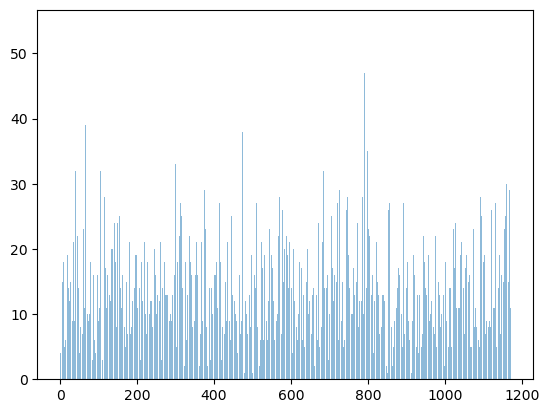

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.bar(df_complete.index, df_complete.n_trust, align='center', alpha=0.5)
plt.ylabel('')
plt.title('')

plt.show()